In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
sys.path.append("..")
from mergetree import *
from matching import *

First Time: 0.010
Second Time: 0.010
[[  0   4]
 [  5   7]
 [  7   9]
 [  9  11]
 [ 11  13]
 [ 13  15]
 [ 15  17]
 [ 17  19]
 [ 19  21]
 [ 21  23]
 [ 23  25]
 [ 26  28]
 [ 28  30]
 [ 30  32]
 [ 33  35]
 [ 35  37]
 [ 38  40]
 [ 40  42]
 [ 42  44]
 [ 44  46]
 [ 47  49]
 [ 49  51]
 [ 51  53]
 [ 53  55]
 [ 55  57]
 [ 57  59]
 [ 59  61]
 [ 61  63]
 [ 64  66]
 [ 67  69]
 [ 70  72]
 [ 76  78]
 [ 78  80]
 [ 81  83]
 [ 87  89]
 [ 89  91]
 [ 94  96]
 [ 96  98]
 [ 98 100]
 [104 106]
 [122 124]
 [125 127]
 [131 133]
 [137 139]
 [141 143]
 [144 146]
 [146 148]
 [148 150]
 [161 163]
 [163 165]
 [165 167]
 [170 172]
 [178 180]]
Verified cost:  37.10691786566679


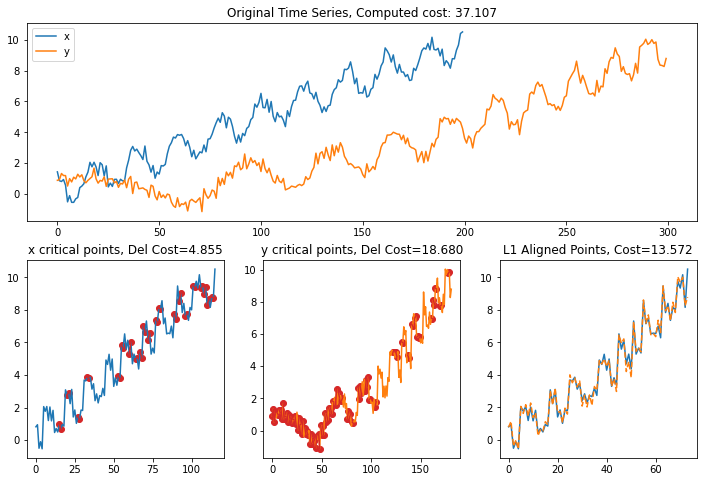

In [2]:
np.random.seed(0)
N = 200
t = np.linspace(0.01, 0.98, N)
x = np.cos(2*np.pi*t*10) + t*10
x += 0.3*np.random.randn(N)
N = 300
t = np.linspace(0.01, 0.98, N)
y = np.cos(2*np.pi*(t**2)*10) + (t**2)*10
y += 0.3*np.random.randn(N)

tic = time.time()
cost, xdel, ydel = dpw(x, y)
toc = time.time()
print("First Time: {:.3f}".format(toc-tic))

tic = time.time()
cost, xdel, ydel = dpw(x, y)
toc = time.time()
print("Second Time: {:.3f}".format(toc-tic))

print(ydel)

plt.figure(figsize=(12, 8))
plt.subplot2grid((2, 3), (0, 0), colspan=3)
plt.plot(x)
plt.plot(y, c='C1')
plt.title("Original Time Series, Computed cost: {:.3f}".format(cost))
plt.legend(["x", "y"])


xc, xs = get_crit_timeseries(x, circular=True)
yc, ys = get_crit_timeseries(y, circular=True)

plt.subplot(234)
plt.plot(xc)
ilast = 0
xnew = []
xcost = 0
for rg in xdel:
    xcost += np.sum(xc[rg[0]:rg[1]]*xs[rg[0]:rg[1]])
    plt.plot(np.arange(rg[0], rg[1]), xc[rg[0]:rg[1]], c='C3')
    plt.scatter(np.arange(rg[0], rg[1]), xc[rg[0]:rg[1]], c='C3')
    xnew = np.concatenate((xnew, xc[ilast:rg[0]]))
    ilast = rg[1]
xnew = np.concatenate((xnew, xc[ilast::]))
plt.title("x critical points, Del Cost={:.3f}".format(xcost))

plt.subplot(235)
plt.plot(yc, c='C1')
ilast = 0
ynew = []
ycost = 0
for rg in ydel:
    ycost += np.sum(yc[rg[0]:rg[1]]*ys[rg[0]:rg[1]])
    plt.plot(np.arange(rg[0], rg[1]), yc[rg[0]:rg[1]], c='C3')
    plt.scatter(np.arange(rg[0], rg[1]), yc[rg[0]:rg[1]], c='C3')
    ynew = np.concatenate((ynew, yc[ilast:rg[0]]))
    ilast = rg[1]
ynew = np.concatenate((ynew, yc[ilast::]))
plt.title("y critical points, Del Cost={:.3f}".format(ycost))

l1cost = np.sum(np.abs(xnew-ynew))
print("Verified cost: ", xcost + ycost + l1cost)

plt.subplot(236)
plt.plot(xnew)
plt.plot(ynew, linestyle='--')
plt.title("L1 Aligned Points, Cost={:.3f}".format(l1cost))
plt.savefig("AlignExample2.svg", bbox_inches='tight')

In [3]:
print("Upper bound: ", np.sum(xc*xs) + np.sum(yc*ys))

Upper bound:  101.12918108917316


In [4]:
print([x[1]-x[0] for x in ydel])
print(ydel)

[4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[[  0   4]
 [  5   7]
 [  7   9]
 [  9  11]
 [ 11  13]
 [ 13  15]
 [ 15  17]
 [ 17  19]
 [ 19  21]
 [ 21  23]
 [ 23  25]
 [ 26  28]
 [ 28  30]
 [ 30  32]
 [ 33  35]
 [ 35  37]
 [ 38  40]
 [ 40  42]
 [ 42  44]
 [ 44  46]
 [ 47  49]
 [ 49  51]
 [ 51  53]
 [ 53  55]
 [ 55  57]
 [ 57  59]
 [ 59  61]
 [ 61  63]
 [ 64  66]
 [ 67  69]
 [ 70  72]
 [ 76  78]
 [ 78  80]
 [ 81  83]
 [ 87  89]
 [ 89  91]
 [ 94  96]
 [ 96  98]
 [ 98 100]
 [104 106]
 [122 124]
 [125 127]
 [131 133]
 [137 139]
 [141 143]
 [144 146]
 [146 148]
 [148 150]
 [161 163]
 [163 165]
 [165 167]
 [170 172]
 [178 180]]
